## Google stock price prediction

_____________________

How to get the latest stock data?

 - Visit Yahoo Finance

 - Search for “MSFT”

 - Click on “Historical Data”

 - Click on “Download”

_____________________

In [17]:
#importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
df = pd.read_csv("GOOGL.csv")

In [4]:
df.sample(12)

,Date,Open,High,Low,Close,Adj Close,Volume
123,2021-03-18,2048.179932,2068.750000,2019.180054,2021.339966,2021.339966,1585000
87,2021-01-26,1885.989990,1915.750000,1876.130005,1907.949951,1907.949951,1573100
58,2020-12-11,1760.000000,1777.310059,1752.739990,1774.800049,1774.800049,931400
122,2021-03-17,2068.469971,2099.000000,2044.119995,2082.219971,2082.219971,1319100
115,2021-03-08,2084.060059,2113.739990,2005.189941,2007.500000,2007.500000,1843400
172,2021-05-27,2389.050049,2389.050049,2356.260010,2362.679932,2362.679932,1761200
84,2021-01-21,1893.650024,1932.079956,1879.410034,1884.150024,1884.150024,2931700
38,2020-11-12,1742.000000,1764.979980,1737.969971,1742.819946,1742.819946,1323700
164,2021-05-17,2263.570068,2289.780029,2255.510010,2288.919922,2288.919922,1079900
189,2021-06-22,2435.000000,2448.000000,2421.280029,2446.610107,2446.610107,1119500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


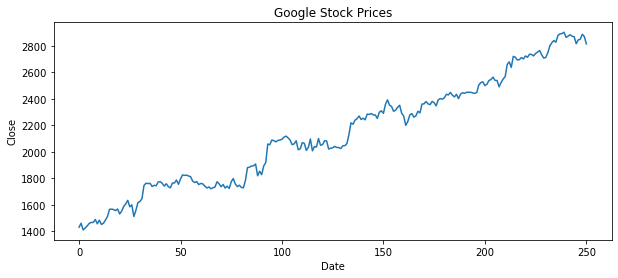

In [6]:
plt.figure(figsize=(10, 4))
plt.title("Google Stock Prices")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(df["Close"])
plt.show()

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999224  0.999267  0.998411   0.998411 -0.276386
High       0.999224  1.000000  0.999201  0.999262   0.999262 -0.265748
Low        0.999267  0.999201  1.000000  0.999356   0.999356 -0.288821
Close      0.998411  0.999262  0.999356  1.000000   1.000000 -0.283646
Adj Close  0.998411  0.999262  0.999356  1.000000   1.000000 -0.283646
Volume    -0.276386 -0.265748 -0.288821 -0.283646  -0.283646  1.000000


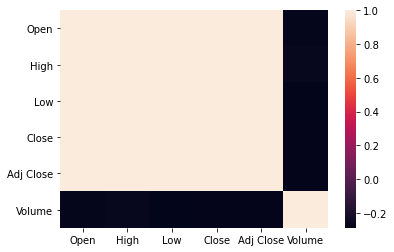

In [7]:
print(df.corr())
sns.heatmap(df.corr())
plt.show()

In [8]:
x = df[["Open", "High", "Low"]]

In [9]:
x

,Open,High,Low
0,1431.619995,1440.060059,1402.680054
1,1450.319946,1463.969971,1429.500000
2,1452.089966,1453.079956,1402.680054
3,1402.680054,1437.989990,1402.150024
4,1425.050049,1445.939941,1407.680054
...,...,...,...
246,2838.989990,2859.000000,2825.000000
247,2859.909912,2867.260010,2835.000000
248,2855.429932,2889.010010,2826.949951
249,2879.010010,2886.000000,2848.030029


In [20]:
#splitting data into features and target
x = df[["Open", "High", "Low"]]
y = df["Close"]

#splitting into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
def predict(model,x_train, x_test, y_train, y_test):
    model.fit(x_train,y_train)
    preds=model.predict(x_test)
    return r2_score(y_test,preds)

In [22]:
LR = LinearRegression()
LSR = Lasso()
RID = Ridge()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
GBR = GradientBoostingRegressor()

In [23]:
Model = [LR,LSR,RID,DTR,RFR,GBR]

In [24]:
Algorithms = ["Linear Regression","Lasso","Ridge","Decision Tree Regressor","Random Forest Regressor","Gradient Boosting Regressor"]

In [25]:
scores = []
for i in Model:
    a = predict(i, x_train, x_test, y_train, y_test)
    scores.append(a)

In [26]:
data = {'Algorithms': Algorithms, 'Scores': scores}
df2 = pd.DataFrame(data=data)
df2.sort_values(by=['Scores'],ascending=False,ignore_index=True,inplace=True)
df2

,Algorithms,Scores
0,Ridge,0.999192
1,Linear Regression,0.999192
2,Lasso,0.998897
3,Gradient Boosting Regressor,0.998825
4,Random Forest Regressor,0.998798
5,Decision Tree Regressor,0.998124


# **Result: We see Ridge (L2 regularization) along with Linear regression has the best R2 score**

_________